<a href="https://colab.research.google.com/github/Aditya-Gupta-ctrl/MRI-detector/blob/main/mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
masoudnickparvar_brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')


100%|██████████| 149M/149M [00:02<00:00, 67.0MB/s]

Extracting files...


Data source import complete.


In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

In [3]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])
    return pd.DataFrame({'Class Path': class_paths, 'Class': classes})

In [13]:
tr_df = train_df('/content/drive/MyDrive/archive/Training')

In [14]:
tr_df

,Class Path,Class
0,/content/drive/MyDrive/archive/Training/pituit...,pituitary
1,/content/drive/MyDrive/archive/Training/pituit...,pituitary
2,/content/drive/MyDrive/archive/Training/pituit...,pituitary
3,/content/drive/MyDrive/archive/Training/pituit...,pituitary
4,/content/drive/MyDrive/archive/Training/pituit...,pituitary
...,...,...
5799,/content/drive/MyDrive/archive/Training/mening...,meningioma
5800,/content/drive/MyDrive/archive/Training/mening...,meningioma
5801,/content/drive/MyDrive/archive/Training/mening...,meningioma
5802,/content/drive/MyDrive/archive/Training/mening...,meningioma


In [11]:
ts_df = test_df('/content/drive/MyDrive/archive/Testing')

In [12]:
ts_df

,Class Path,Class
0,/content/drive/MyDrive/archive/Testing/pituita...,pituitary
1,/content/drive/MyDrive/archive/Testing/pituita...,pituitary
2,/content/drive/MyDrive/archive/Testing/pituita...,pituitary
3,/content/drive/MyDrive/archive/Testing/pituita...,pituitary
4,/content/drive/MyDrive/archive/Testing/pituita...,pituitary
...,...,...
1306,/content/drive/MyDrive/archive/Testing/glioma/...,glioma
1307,/content/drive/MyDrive/archive/Testing/glioma/...,glioma
1308,/content/drive/MyDrive/archive/Testing/glioma/...,glioma
1309,/content/drive/MyDrive/archive/Testing/glioma/...,glioma


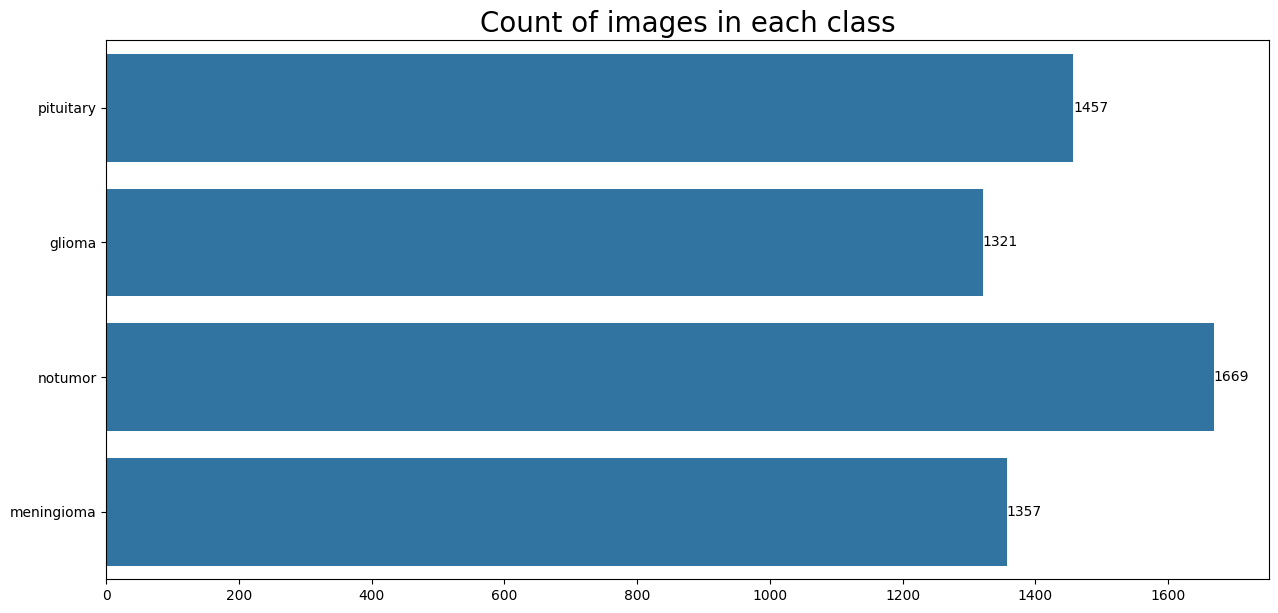

In [15]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()